<a href="https://colab.research.google.com/github/Neo-glitch/t.f-2.0-practice/blob/master/Traffic_Sign_Image_Classification_using_LeNet_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Description

    ClassId                                           SignName
* 0        =>                               Speed limit (20km/h)
* 1        =>                              Speed limit (30km/h)
* 2        =>                               Speed limit (50km/h)
* 3        =>                              Speed limit (60km/h)
* 4        =>                              Speed limit (70km/h)
* 5        =>                              Speed limit (80km/h)
* 6        =>                        End of speed limit (80km/h)
* 7        =>                              Speed limit (100km/h)
* 8        =>                              Speed limit (120km/h)
* 9        =>                                        No passing
* 10       =>       No passing for vehicles over 3.5 metric tons
* 11       =>              Right-of-way at the next intersection
* 12       =>                                      Priority road
* 13       =>                                              Yield
* 14       =>                                               Stop
* 15       =>                                        No vehicles
* 16       =>         Vehicles over 3.5 metric tons prohibited
* 16       =>         Vehicles over 3.5 metric tons prohibited
* 17       =>                                           No entry
* 18       =>                                    General caution
* 19       =>                        Dangerous curve to the left
* 20       =>                       Dangerous curve to the right
* 21       =>                                       Double curve
* 22       =>                                         Bumpy road
* 23       =>                                      Slippery road
* 24       =>                          Road narrows on the right
* 25       =>                                          Road work
* 26       =>                                    Traffic signals
* 27       =>                                        Pedestrians
* 28       =>                                  Children crossing
* 29       =>                                  Bicycles crossing
* 30       =>                                 Beware of ice/snow
* 31       =>                              Wild animals crossing
* 32       =>                End of all speed and passing limits
* 33       =>                                   Turn right ahead
* 34       =>                                    Turn left ahead
* 35       =>                                         Ahead only
* 36       =>                               Go straight or right
* 37       =>                                Go straight or left
* 38       =>                                         Keep right
* 39       =>                                          Keep left
* 40       =>                               Roundabout mandatory
* 41       =>                                  End of no passing
* 42       =>  End of no passing by vehicles over 3.5 metric ...

### Link kaggle to Google Colab

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"princeneo","key":"f0986ad408f2ff73081607433165d1ce"}'}

In [ ]:
# make a kaggle dir
!mkdir ~/.kaggle

In [ ]:
# copies kaggle json to kaggle dir
!cp kaggle.json ~/.kaggle/

In [ ]:
# gives permission
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# list of datasets on kaggle(just to check if all is working)
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            965        680  0.9375           
datasets/muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00           1052        628  0.875            
datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           3796         94  1.0              


In [ ]:
# downloads the traffic dataset
!kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed

100% 4.16G/4.16G [01:37<00:00, 45.4MB/s]
100% 4.16G/4.16G [01:37<00:00, 45.8MB/s]


In [ ]:
# make dir to store the unzipped data
!mkdir traffic_signs

In [ ]:
# unzip the data into fahsiondir
!unzip traffic-signs-preprocessed.zip -d traffic_signs

Archive:  traffic-signs-preprocessed.zip
  inflating: traffic_signs/data0.pickle  
  inflating: traffic_signs/data1.pickle  
  inflating: traffic_signs/data2.pickle  
  inflating: traffic_signs/data3.pickle  
  inflating: traffic_signs/data4.pickle  
  inflating: traffic_signs/data5.pickle  
  inflating: traffic_signs/data6.pickle  
  inflating: traffic_signs/data7.pickle  
  inflating: traffic_signs/data8.pickle  
  inflating: traffic_signs/datasets_preparing.py  
  inflating: traffic_signs/label_names.csv  
  inflating: traffic_signs/labels.pickle  
  inflating: traffic_signs/mean_image_gray.pickle  
  inflating: traffic_signs/mean_image_rgb.pickle  
  inflating: traffic_signs/std_gray.pickle  
  inflating: traffic_signs/std_rgb.pickle  
  inflating: traffic_signs/test.pickle  
  inflating: traffic_signs/train.pickle  
  inflating: traffic_signs/valid.pickle  


### Setup 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import seaborn as sns
import pickle

In [ ]:
# gets data for work
with open("/content/traffic_signs/train.pickle", "rb") as training_data:
  train = pickle.load(training_data)

with open("/content/traffic_signs/valid.pickle", "rb") as validation_data:
  valid = pickle.load(validation_data)

with open("/content/traffic_signs/test.pickle", "rb") as testing_data:
  test = pickle.load(testing_data)

In [ ]:
x_train, y_train = train["features"], train["labels"]
x_validation, y_validation = valid["features"], valid["labels"]
x_test, y_test = test["features"], test["labels"]


x_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

### Viz dataset

2

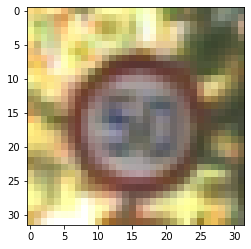

In [ ]:
i = np.random.randint(0, len(x_train))
plt.imshow(x_train[i])
y_train[i]

36

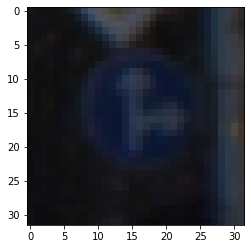

In [ ]:
i = np.random.randint(0, len(x_train))
plt.imshow(x_train[i])
y_train[i]

### Data Prep

In [ ]:
from sklearn.utils import shuffle  # to shuffle data

x_train, y_train = shuffle(x_train, y_train)

x_train[0].shape

(32, 32, 3)

In [ ]:
# convert images from color to gray scale, still other ways for doing this though
x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)
x_validation_gray = np.sum(x_validation/3, axis = 3, keepdims = True)

x_train_gray.max()

255.0

In [ ]:
# normalize data
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128) / 128
x_validation_gray_norm = (x_validation_gray - 128) / 128


x_train_gray_norm.max()

0.9921875

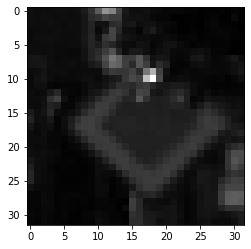

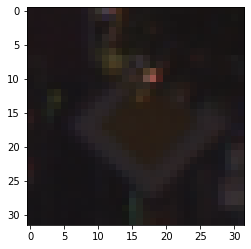

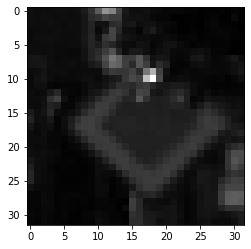

In [ ]:
i = 900

# squeeze turns shape from x, x, 1 to x, x
plt.imshow(x_train_gray[i].squeeze(), cmap="gray")

plt.figure()
plt.imshow(x_train[i])

plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap="gray")

In [ ]:
# LeNet architecture, normal output layer is 10 neurons but for my use case I used 43 neurons

leNet = keras.models.Sequential([
      keras.layers.Conv2D(6, (5, 5), activation="relu", input_shape = (32, 32, 1)),
      keras.layers.MaxPooling2D(),
      keras.layers.Conv2D(16, (5,5), activation="relu"),
      keras.layers.MaxPooling2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation="relu"),
      keras.layers.Dense(84, activation ="relu"),
      keras.layers.Dense(43, activation="softmax")  # output
])

leNet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 120)              

In [ ]:
leNet.compile(optimizer = "Adam", loss ="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = leNet.fit(x_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 60, verbose = 1,
                    validation_data = (x_validation_gray_norm, y_validation))

Epoch 1/60
70/70 [==============================] - 1s 10ms/step - loss: 3.0847 - accuracy: 0.2011 - val_loss: 2.5710 - val_accuracy: 0.3358
Epoch 2/60
70/70 [==============================] - 0s 7ms/step - loss: 1.5661 - accuracy: 0.5693 - val_loss: 1.3471 - val_accuracy: 0.6193
Epoch 3/60
70/70 [==============================] - 0s 6ms/step - loss: 0.8825 - accuracy: 0.7573 - val_loss: 0.9402 - val_accuracy: 0.7537
Epoch 4/60
70/70 [==============================] - 0s 6ms/step - loss: 0.6050 - accuracy: 0.8374 - val_loss: 0.7342 - val_accuracy: 0.8039
Epoch 5/60
70/70 [==============================] - 0s 7ms/step - loss: 0.4590 - accuracy: 0.8801 - val_loss: 0.6732 - val_accuracy: 0.8243
Epoch 6/60
70/70 [==============================] - 0s 7ms/step - loss: 0.3611 - accuracy: 0.9095 - val_loss: 0.6247 - val_accuracy: 0.8374
Epoch 7/60
70/70 [==============================] - 0s 6ms/step - loss: 0.3012 - accuracy: 0.9258 - val_loss: 0.6010 - val_accuracy: 0.8540
Epoch 8/60
70/70 [=

In [ ]:
# model eval
score = leNet.evaluate(x_test_gray_norm, y_test)

print(f"Test Accuracy is: {score[1]}")

395/395 [==============================] - 1s 2ms/step - loss: 1.1541 - accuracy: 0.9066
Test Accuracy is: 0.906571626663208


In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]


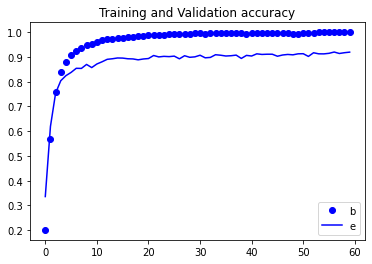

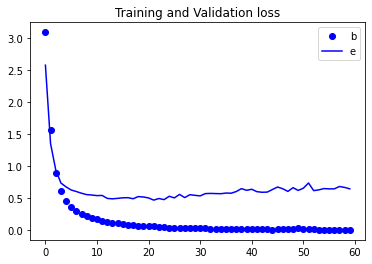

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "bo", label="Train accuracy")
plt.plot(epochs, val_accuracy, "b", label = "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend("best")

plt.figure()
plt.plot(epochs, loss, "bo", label="Train loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend("best")

In [ ]:
predictions = leNet.predict(x_test_gray_norm)

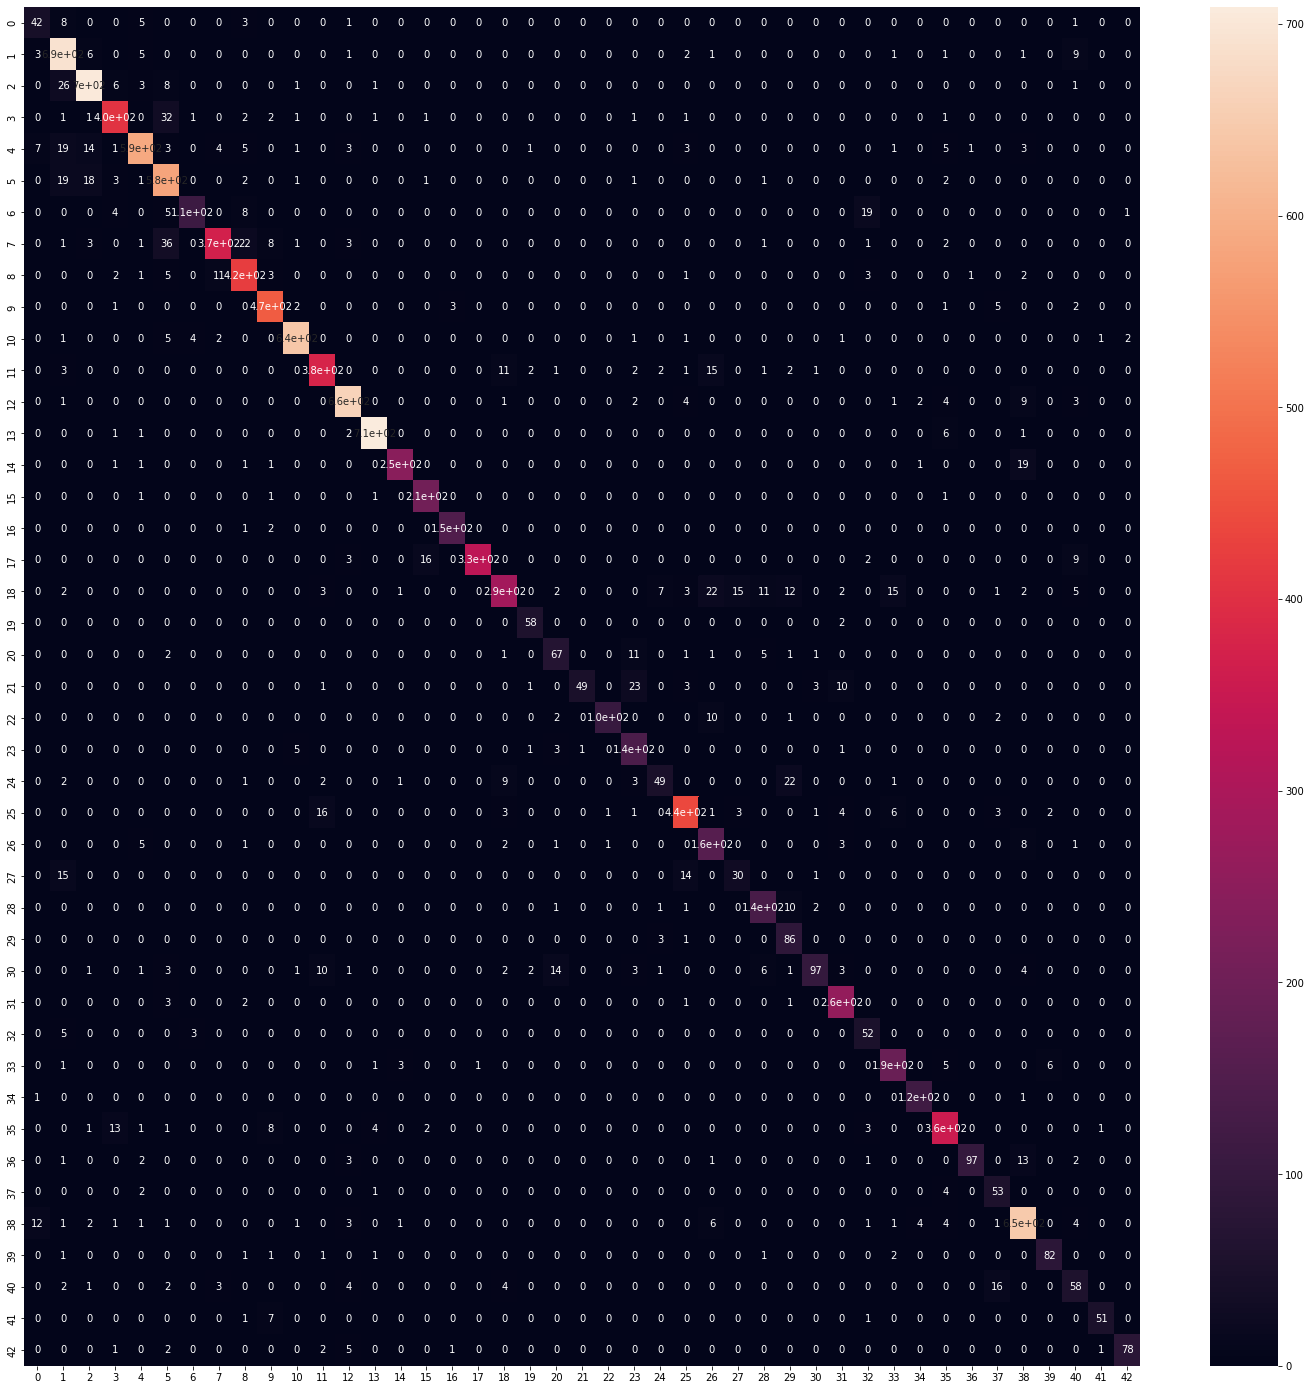

In [ ]:
from sklearn.metrics import confusion_matrix

# predictions on vertical columns and actual on horizontal rows
cm = confusion_matrix(y_test, np.array([np.argmax(prediction) for prediction in predictions]))
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report

num_classes = 43

target_names = ["class {}".format(i) for i in range(num_classes)]

# classification report based on each class
print(classification_report(y_test, np.array([np.argmax(prediction) for prediction in predictions]), 
                            target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.65      0.70      0.67        60
     class 1       0.86      0.96      0.91       720
     class 2       0.94      0.94      0.94       750
     class 3       0.92      0.90      0.91       450
     class 4       0.95      0.89      0.92       660
     class 5       0.84      0.92      0.88       630
     class 6       0.93      0.75      0.83       150
     class 7       0.95      0.82      0.88       450
     class 8       0.89      0.94      0.91       450
     class 9       0.93      0.97      0.95       480
    class 10       0.98      0.97      0.98       660
    class 11       0.92      0.90      0.91       420
    class 12       0.96      0.96      0.96       690
    class 13       0.99      0.98      0.99       720
    class 14       0.98      0.91      0.94       270
    class 15       0.91      0.98      0.94       210
    class 16       0.97      0.98      0.98       150
    class 17       1.00    

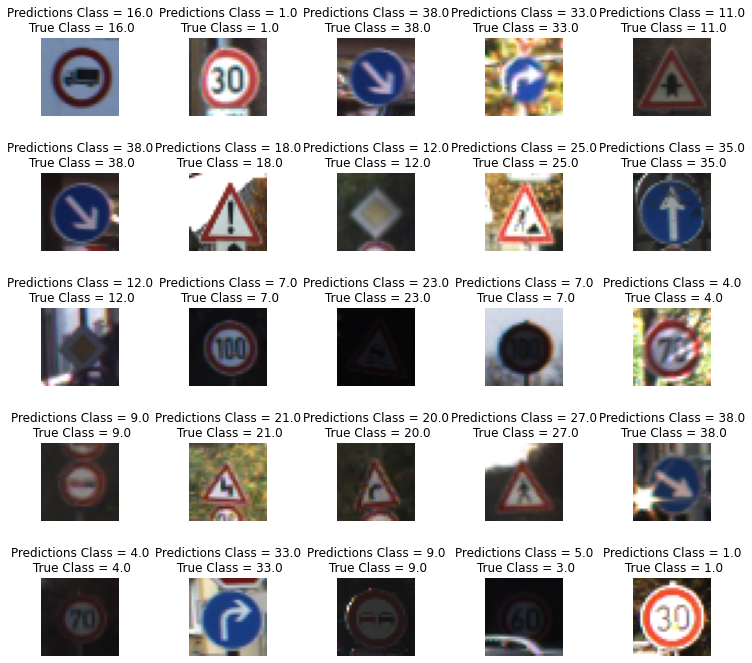

In [ ]:
l = 5
w = 5
fig, axes = plt.subplots(l, w, figsize = (12, 12))

axes = axes.ravel()

for i in np.arange(0, l*w):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Predictions Class = {:.1f}\n True Class = {:0.1f}".format(np.argmax(predictions[i]), y_test[i]))
  axes[i].axis("off")


# to space plots
plt.subplots_adjust(wspace=0.9)

**N:b: To improve model, we could just do image augmentation to get more data**